In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os


# Load and explore data
data_path = '/home/hlife/Mamba-experiment/attention_difference/experiments/alpha_beta_stats_06094409/5ae03a3655429942ec259c50.pt'
data = torch.load(data_path)

print("=" * 70)
print("DATA LOADED")
print("=" * 70)
print(f"File: {data_path}")
print(f"Size: {os.path.getsize(data_path) / (1024**3):.2f} GB")
print(f"\nKeys: {list(data.keys())}")

print("\n" + "=" * 70)
print("DETAILED INFORMATION")
print("=" * 70)
for key, value in data.items():
    print(f"\n[{key}]")
    if isinstance(value, torch.Tensor):
        print(f"  Shape: {list(value.shape)} | Dtype: {value.dtype}")
        print(f"  Memory: {value.element_size() * value.nelement() / (1024**2):.2f} MB")
        print(f"  Range: [{value.min().item():.6f}, {value.max().item():.6f}]")
        print(f"  Mean±Std: {value.mean().item():.6f} ± {value.std().item():.6f}")
    else:
        print(f"  Value: {value}")


/tmp/ipykernel_1445198/974381204.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


DATA LOADED
File: /home/hlife/Mamba-experiment/attention_difference/experiments/alpha_beta_stats_06094409/5ae03a3655429942ec259c50.pt
Size: 1.39 GB

Keys: ['alpha_mean', 'alpha_var', 'beta_mean', 'beta_var', 'doc2_id', 'num_doc1_samples', 'max_seqlen']

DETAILED INFORMATION

[alpha_mean]
  Shape: [64, 504, 5120] | Dtype: torch.float32
  Memory: 630.00 MB
  Range: [-1.882141, 5.325685]
  Mean±Std: 0.008631 ± 0.029068

[alpha_var]
  Shape: [64, 504, 5120] | Dtype: torch.float32
  Memory: 630.00 MB
  Range: [0.000000, 1831.853882]
  Mean±Std: 0.129426 ± 1.564969

[beta_mean]
  Shape: [64, 4, 5120, 16] | Dtype: torch.float32
  Memory: 80.00 MB
  Range: [-8.949487, 8.579808]
  Mean±Std: 0.012562 ± 0.318141

[beta_var]
  Shape: [64, 4, 5120, 16] | Dtype: torch.float32
  Memory: 80.00 MB
  Range: [0.000000, 8.516204]
  Mean±Std: 0.066808 ± 0.416795

[doc2_id]
  Value: 5ae03a3655429942ec259c50

[num_doc1_samples]
  Value: 1000

[max_seqlen]
  Value: 504


Visualizing 6 randomly selected channels: [ 530 1729 1010 1149 1383 4102]


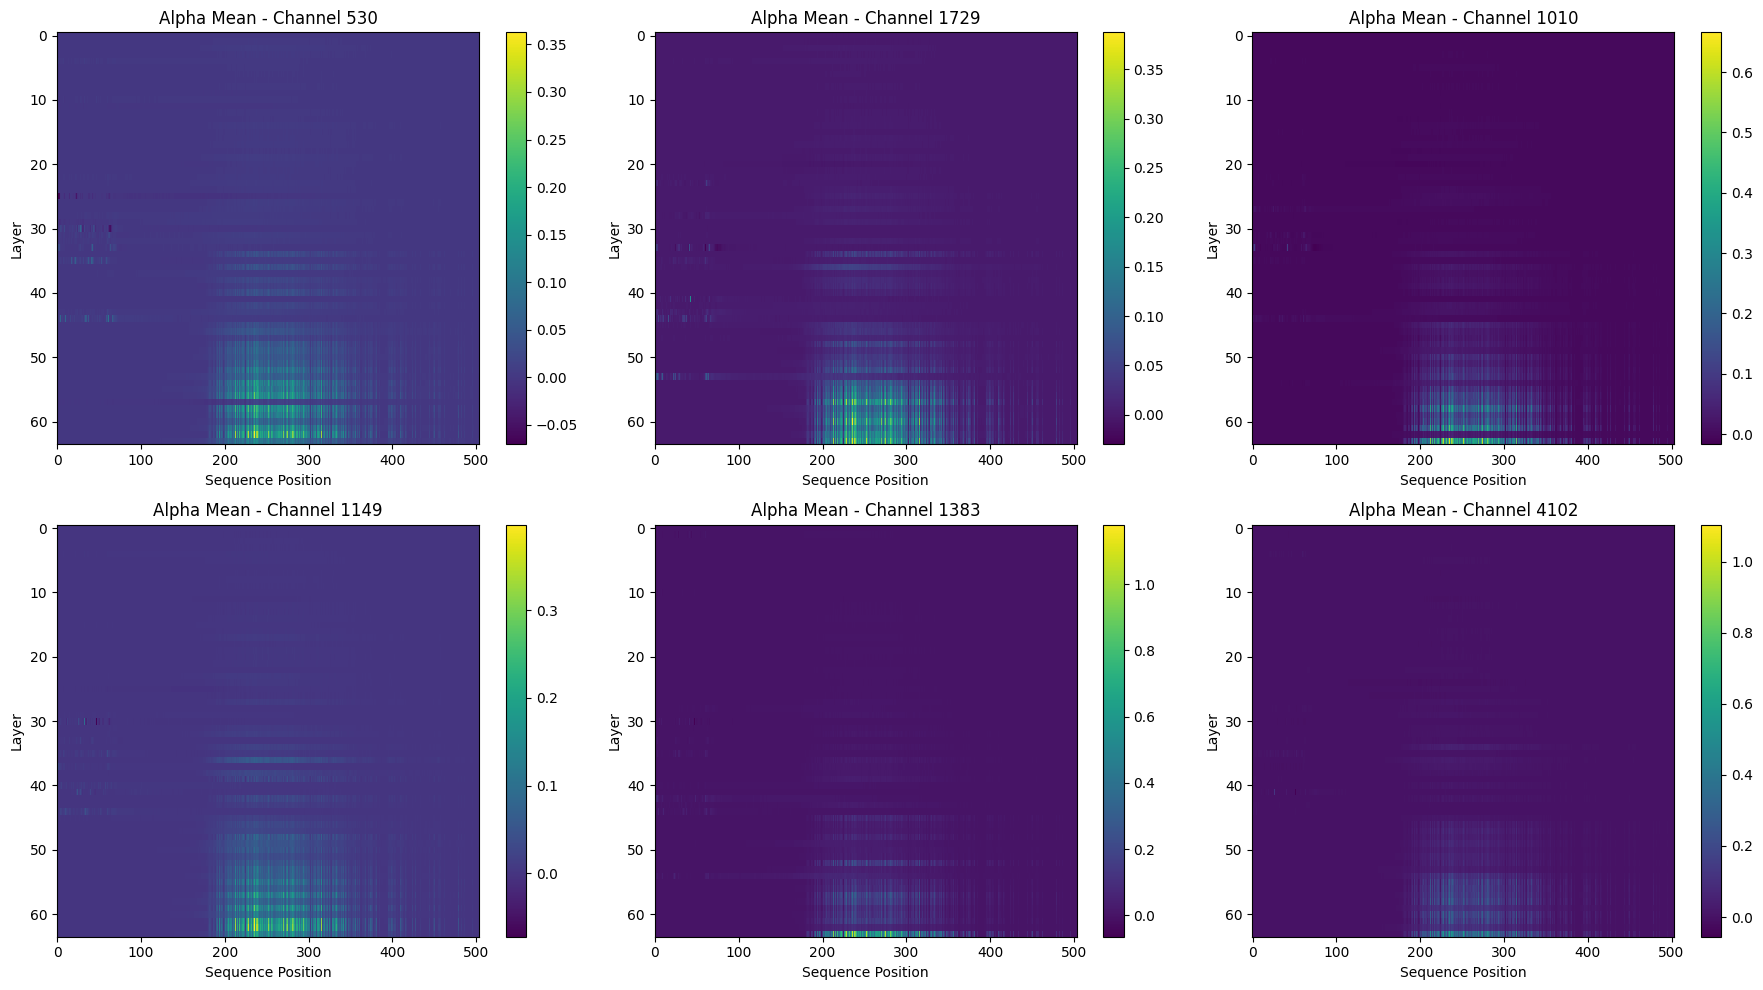

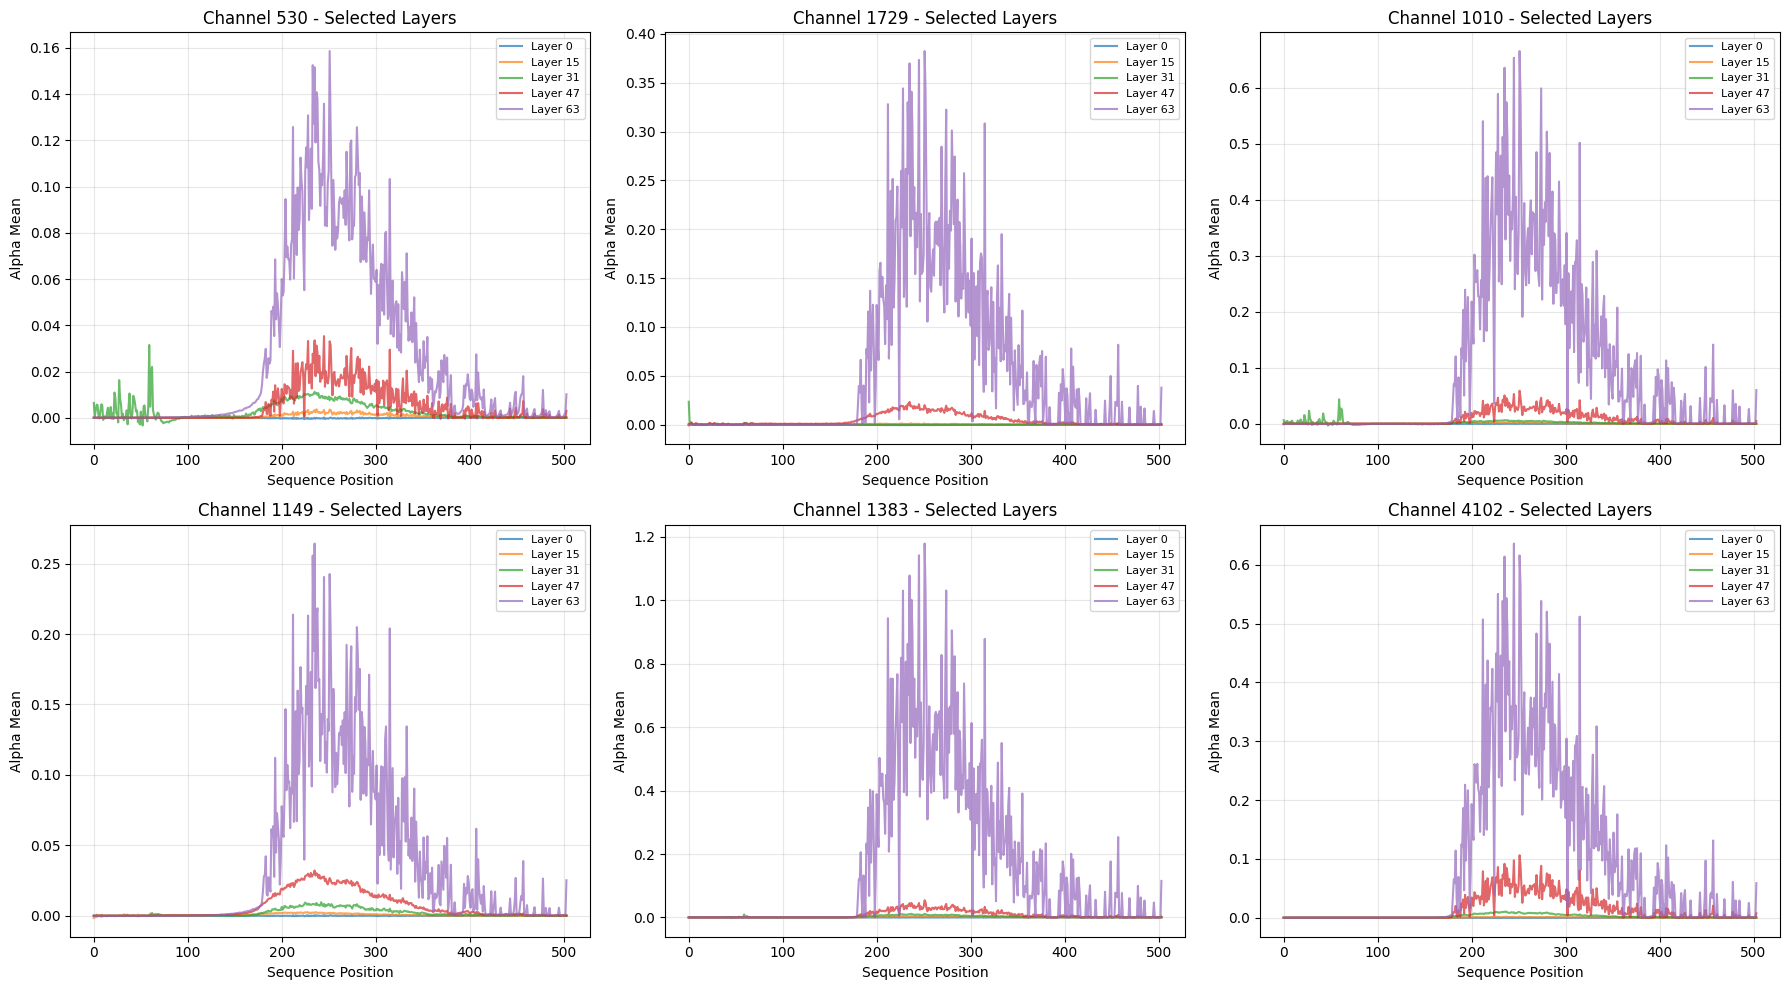

In [32]:
# Visualize Alpha Mean - Random Channels
alpha_mean = data['alpha_mean']  # [64, seqlen, 5120]

# Randomly select channels to visualize
np.random.seed(42)
n_channels = 6
selected_channels = np.random.choice(5120, n_channels, replace=False)
selected_layers = [0, 15, 31, 47, 63]

print(f"Visualizing {n_channels} randomly selected channels: {selected_channels}")

# Create subplots for each channel
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, ch in enumerate(selected_channels):
    # Get alpha for this channel: [64, seqlen]
    alpha_ch = alpha_mean[:, :, ch].cpu().numpy()
    
    # Plot heatmap
    im = axes[idx].imshow(alpha_ch, aspect='auto', cmap='viridis', interpolation='nearest')
    axes[idx].set_xlabel('Sequence Position')
    axes[idx].set_ylabel('Layer')
    axes[idx].set_title(f'Alpha Mean - Channel {ch}')
    plt.colorbar(im, ax=axes[idx])

plt.tight_layout()
plt.show()

# Also plot selected layers for these channels
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, ch in enumerate(selected_channels):
    for layer in selected_layers:
        alpha_ch_layer = alpha_mean[layer, :, ch].cpu().numpy()
        axes[idx].plot(alpha_ch_layer, label=f'Layer {layer}', alpha=0.7)
    
    axes[idx].set_xlabel('Sequence Position')
    axes[idx].set_ylabel('Alpha Mean')
    axes[idx].set_title(f'Channel {ch} - Selected Layers')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Visualizing variance for the same 6 channels: [ 530 1729 1010 1149 1383 4102]


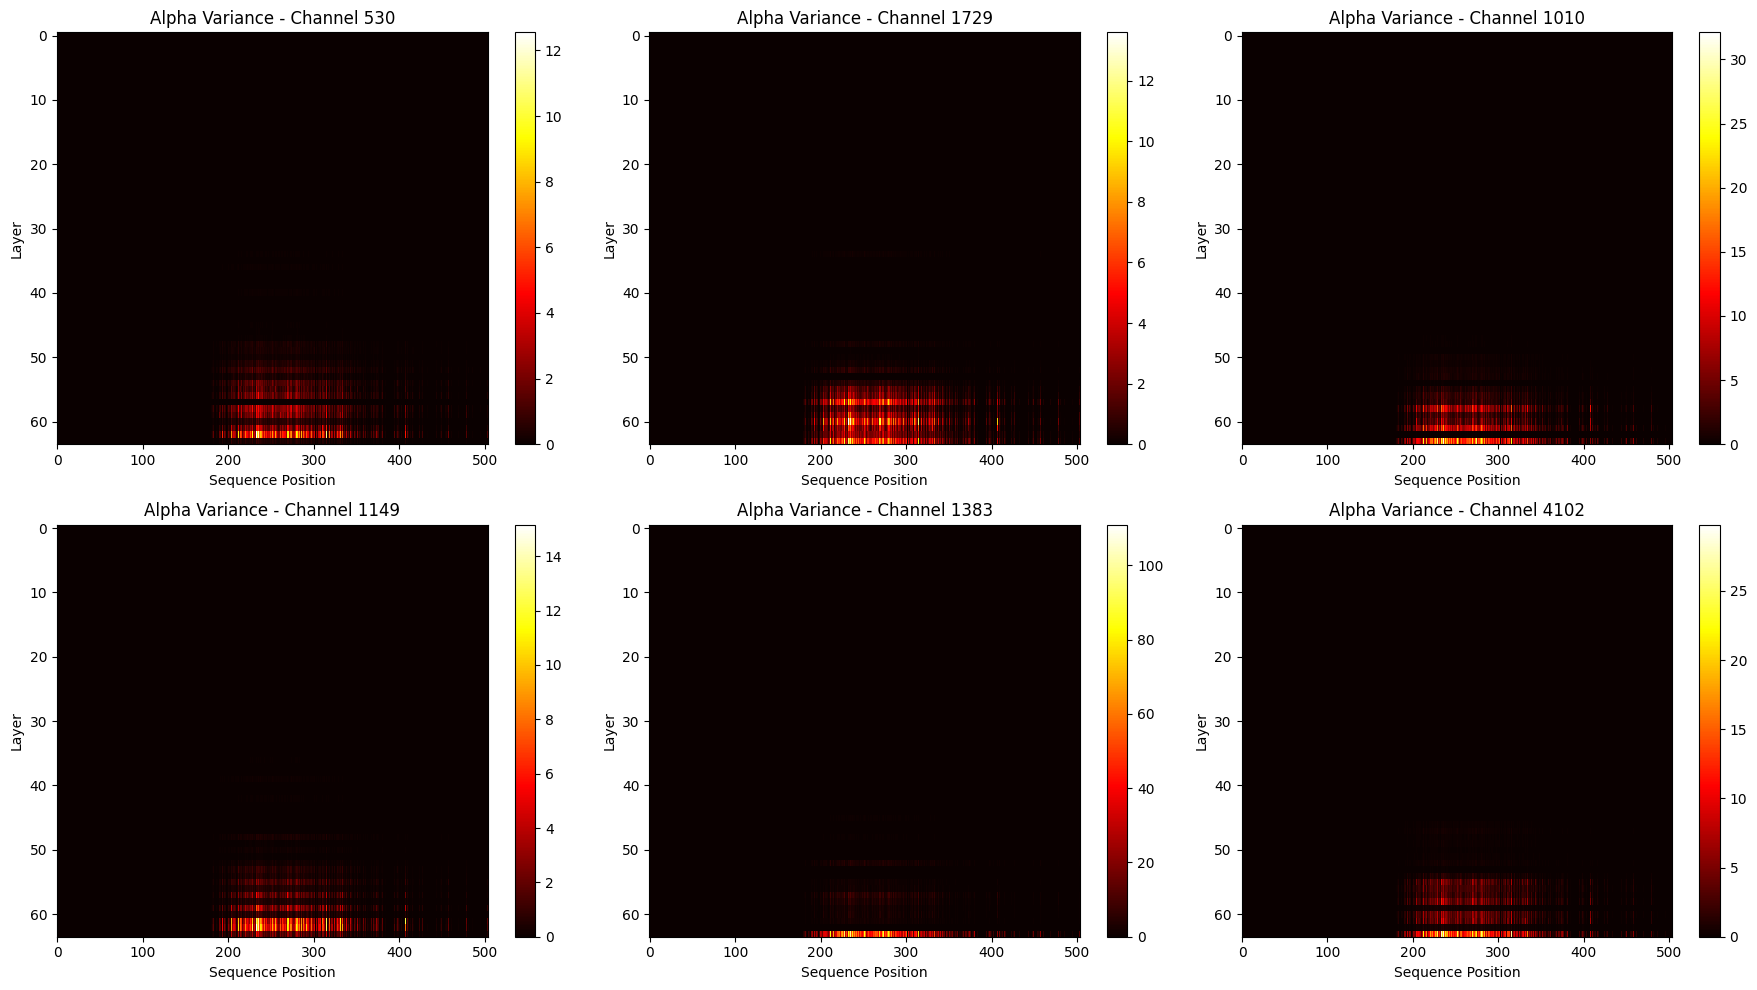

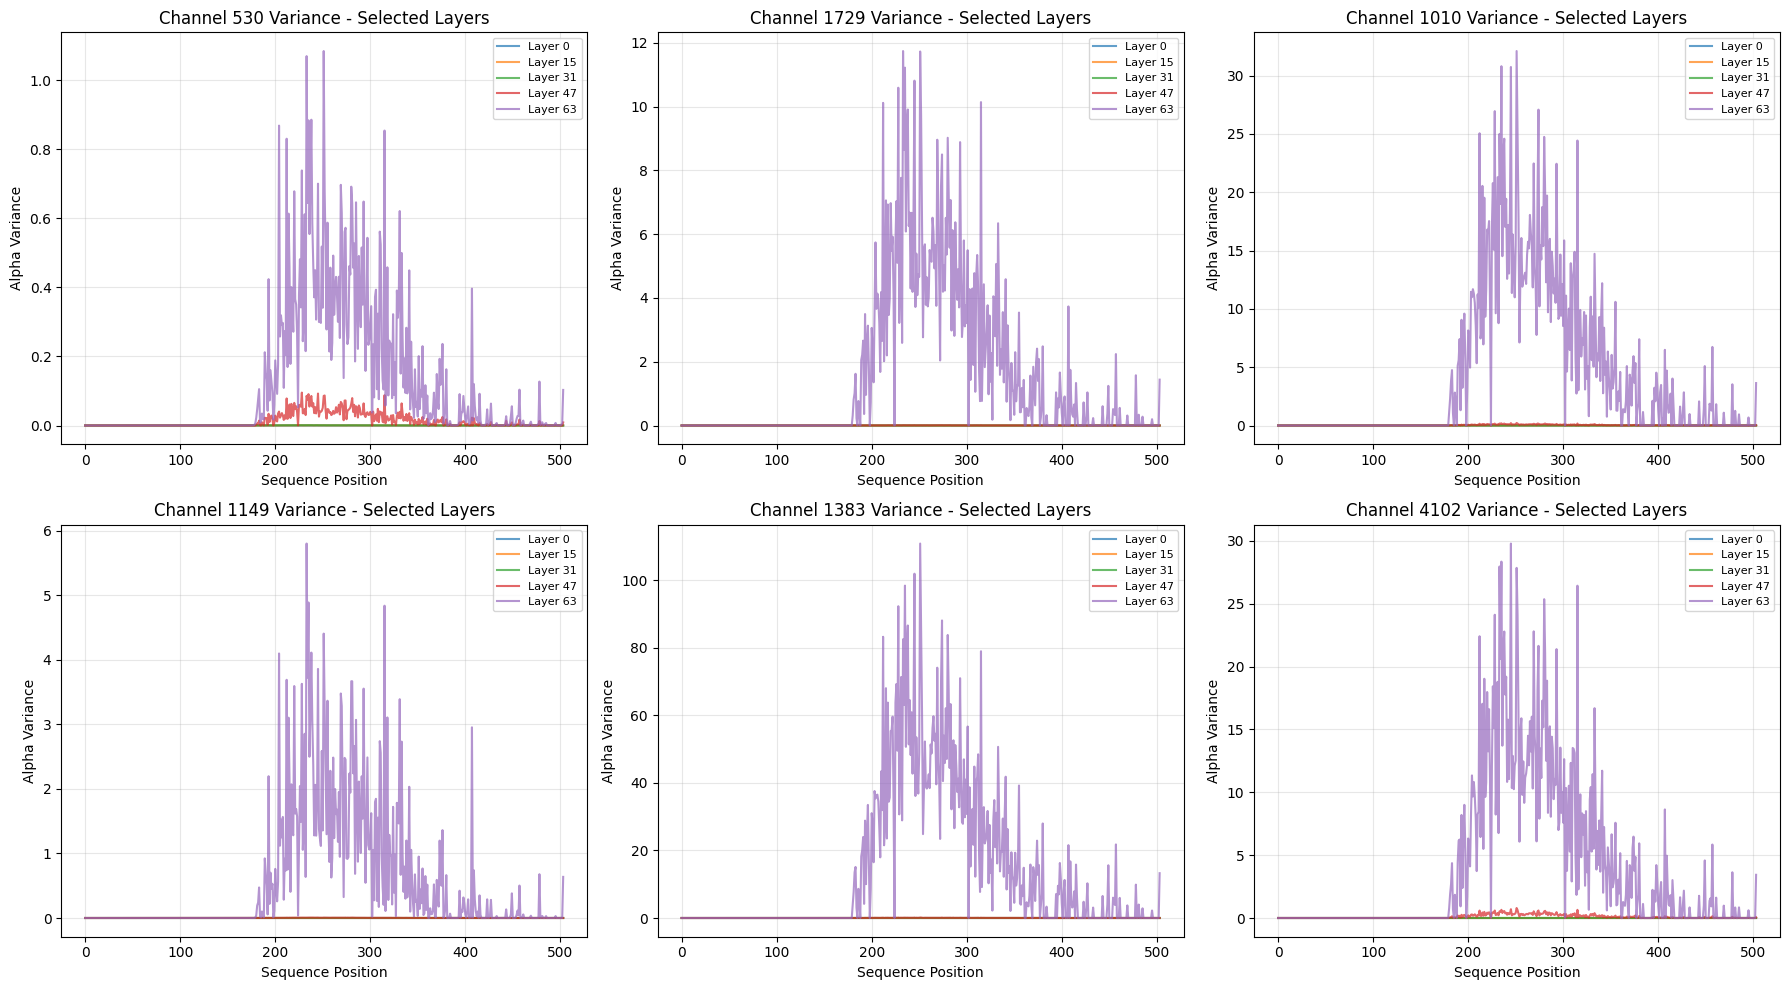

In [33]:
# Visualize Alpha Variance - Same Random Channels
alpha_var = data['alpha_var']  # [64, seqlen, 5120]

print(f"Visualizing variance for the same {n_channels} channels: {selected_channels}")

# Create subplots for each channel's variance
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, ch in enumerate(selected_channels):
    # Get alpha variance for this channel: [64, seqlen]
    alpha_var_ch = alpha_var[:, :, ch].cpu().numpy()
    
    # Plot heatmap
    im = axes[idx].imshow(alpha_var_ch, aspect='auto', cmap='hot', interpolation='nearest')
    axes[idx].set_xlabel('Sequence Position')
    axes[idx].set_ylabel('Layer')
    axes[idx].set_title(f'Alpha Variance - Channel {ch}')
    plt.colorbar(im, ax=axes[idx])

plt.tight_layout()
plt.show()

# Also plot selected layers for variance
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, ch in enumerate(selected_channels):
    for layer in selected_layers:
        alpha_var_ch_layer = alpha_var[layer, :, ch].cpu().numpy()
        axes[idx].plot(alpha_var_ch_layer, label=f'Layer {layer}', alpha=0.7)
    
    axes[idx].set_xlabel('Sequence Position')
    axes[idx].set_ylabel('Alpha Variance')
    axes[idx].set_title(f'Channel {ch} Variance - Selected Layers')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


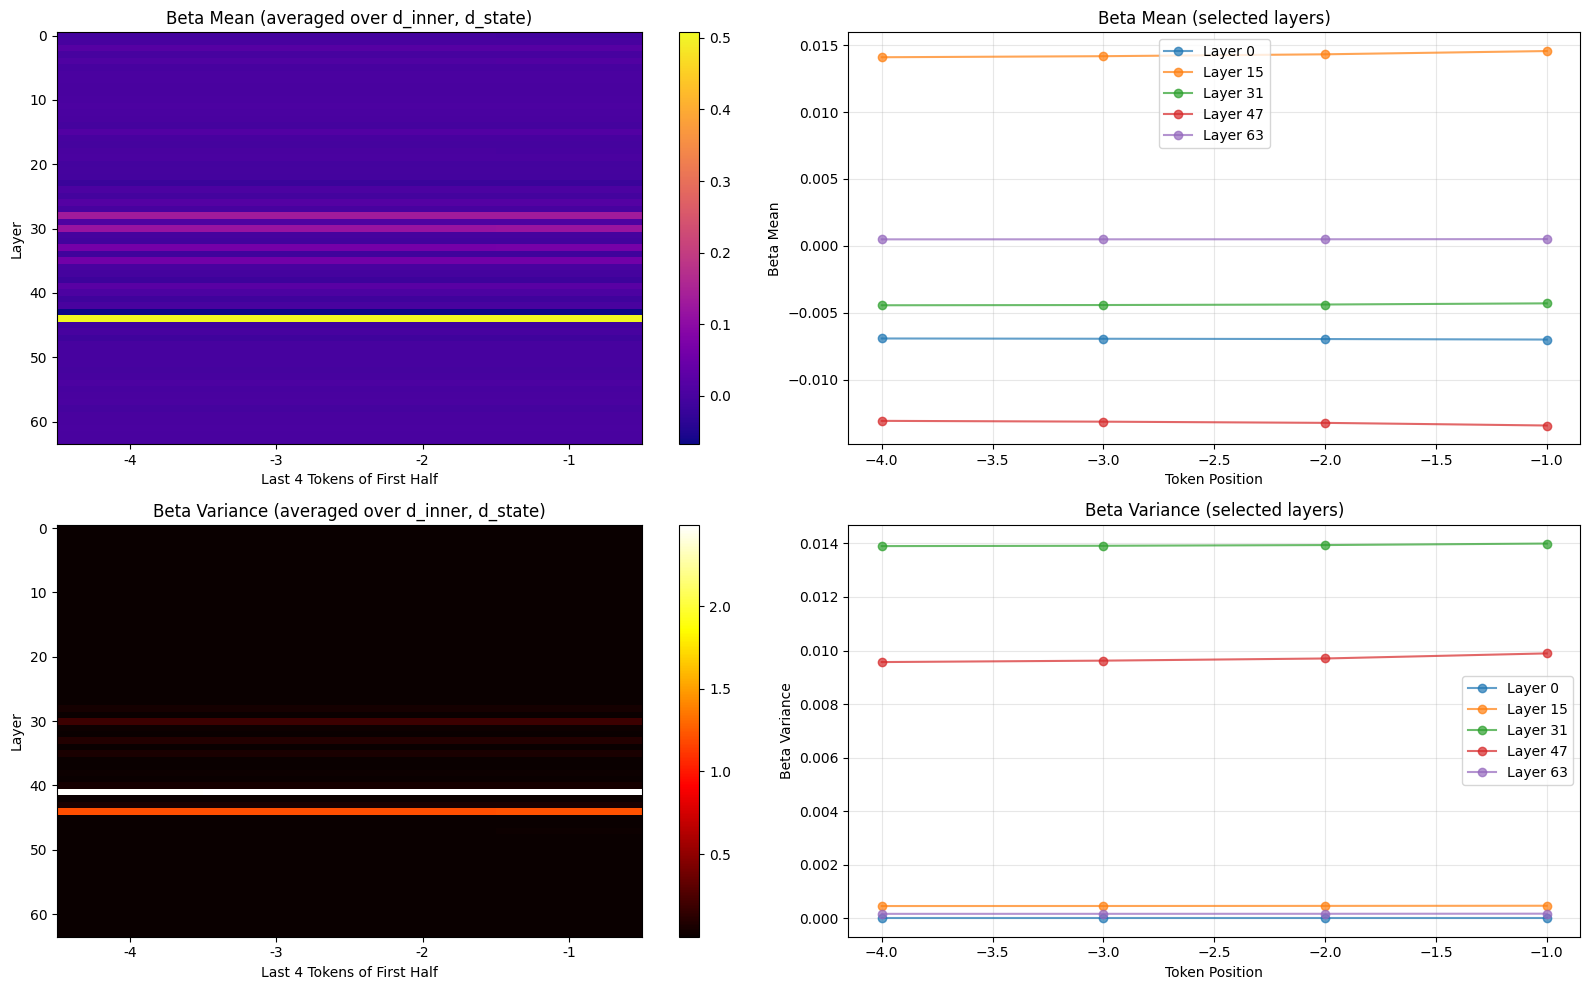

In [34]:
# Beta visualization (averaged over d_inner and d_state for overview)
beta_mean = data['beta_mean']  # [64, 4, 5120, 16]
beta_var = data['beta_var']

beta_mean_avg = beta_mean.mean(dim=(2, 3))
beta_var_avg = beta_var.mean(dim=(2, 3))

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
selected_layers = [0, 15, 31, 47, 63]
x_pos = [-4, -3, -2, -1]

# Beta Mean
im1 = axes[0, 0].imshow(beta_mean_avg.cpu().numpy(), aspect='auto', cmap='plasma', interpolation='nearest')
axes[0, 0].set_xlabel('Last 4 Tokens of First Half')
axes[0, 0].set_ylabel('Layer')
axes[0, 0].set_title('Beta Mean (averaged over d_inner, d_state)')
axes[0, 0].set_xticks([0, 1, 2, 3])
axes[0, 0].set_xticklabels(['-4', '-3', '-2', '-1'])
plt.colorbar(im1, ax=axes[0, 0])

for layer in selected_layers:
    axes[0, 1].plot(x_pos, beta_mean_avg[layer].cpu().numpy(), marker='o', label=f'Layer {layer}', alpha=0.7)
axes[0, 1].set_xlabel('Token Position')
axes[0, 1].set_ylabel('Beta Mean')
axes[0, 1].set_title('Beta Mean (selected layers)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Beta Variance
im2 = axes[1, 0].imshow(beta_var_avg.cpu().numpy(), aspect='auto', cmap='hot', interpolation='nearest')
axes[1, 0].set_xlabel('Last 4 Tokens of First Half')
axes[1, 0].set_ylabel('Layer')
axes[1, 0].set_title('Beta Variance (averaged over d_inner, d_state)')
axes[1, 0].set_xticks([0, 1, 2, 3])
axes[1, 0].set_xticklabels(['-4', '-3', '-2', '-1'])
plt.colorbar(im2, ax=axes[1, 0])

for layer in selected_layers:
    axes[1, 1].plot(x_pos, beta_var_avg[layer].cpu().numpy(), marker='o', label=f'Layer {layer}', alpha=0.7)
axes[1, 1].set_xlabel('Token Position')
axes[1, 1].set_ylabel('Beta Variance')
axes[1, 1].set_title('Beta Variance (selected layers)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Alpha (A矩阵) 可视化


In [35]:
# Summary
print("=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"\nDoc2 ID: {data['doc2_id']}")
print(f"Aggregated over: {data['num_doc1_samples']} doc1 samples")
print(f"Max sequence length: {data['max_seqlen']} tokens")
print()
print("Data Structure:")
print(f"  • alpha_mean/var: [64 layers, {data['max_seqlen']} tokens, 5120 channels]")
print(f"  • beta_mean/var:  [64 layers, 4 tokens, 5120 channels, 16 states]")
print()
print("Interpretation:")
print("  • Alpha: Attention scores from each token → LAST token")
print("  • Beta:  State propagation from doc1 last 4 tokens → doc2 LAST token")
print("  • Statistics computed via Welford's online algorithm (O(1) memory)")
print("=" * 70)


SUMMARY

Doc2 ID: 5ae03a3655429942ec259c50
Aggregated over: 1000 doc1 samples
Max sequence length: 504 tokens

Data Structure:
  • alpha_mean/var: [64 layers, 504 tokens, 5120 channels]
  • beta_mean/var:  [64 layers, 4 tokens, 5120 channels, 16 states]

Interpretation:
  • Alpha: Attention scores from each token → LAST token
  • Beta:  State propagation from doc1 last 4 tokens → doc2 LAST token
  • Statistics computed via Welford's online algorithm (O(1) memory)


## Beta (B矩阵) 可视化


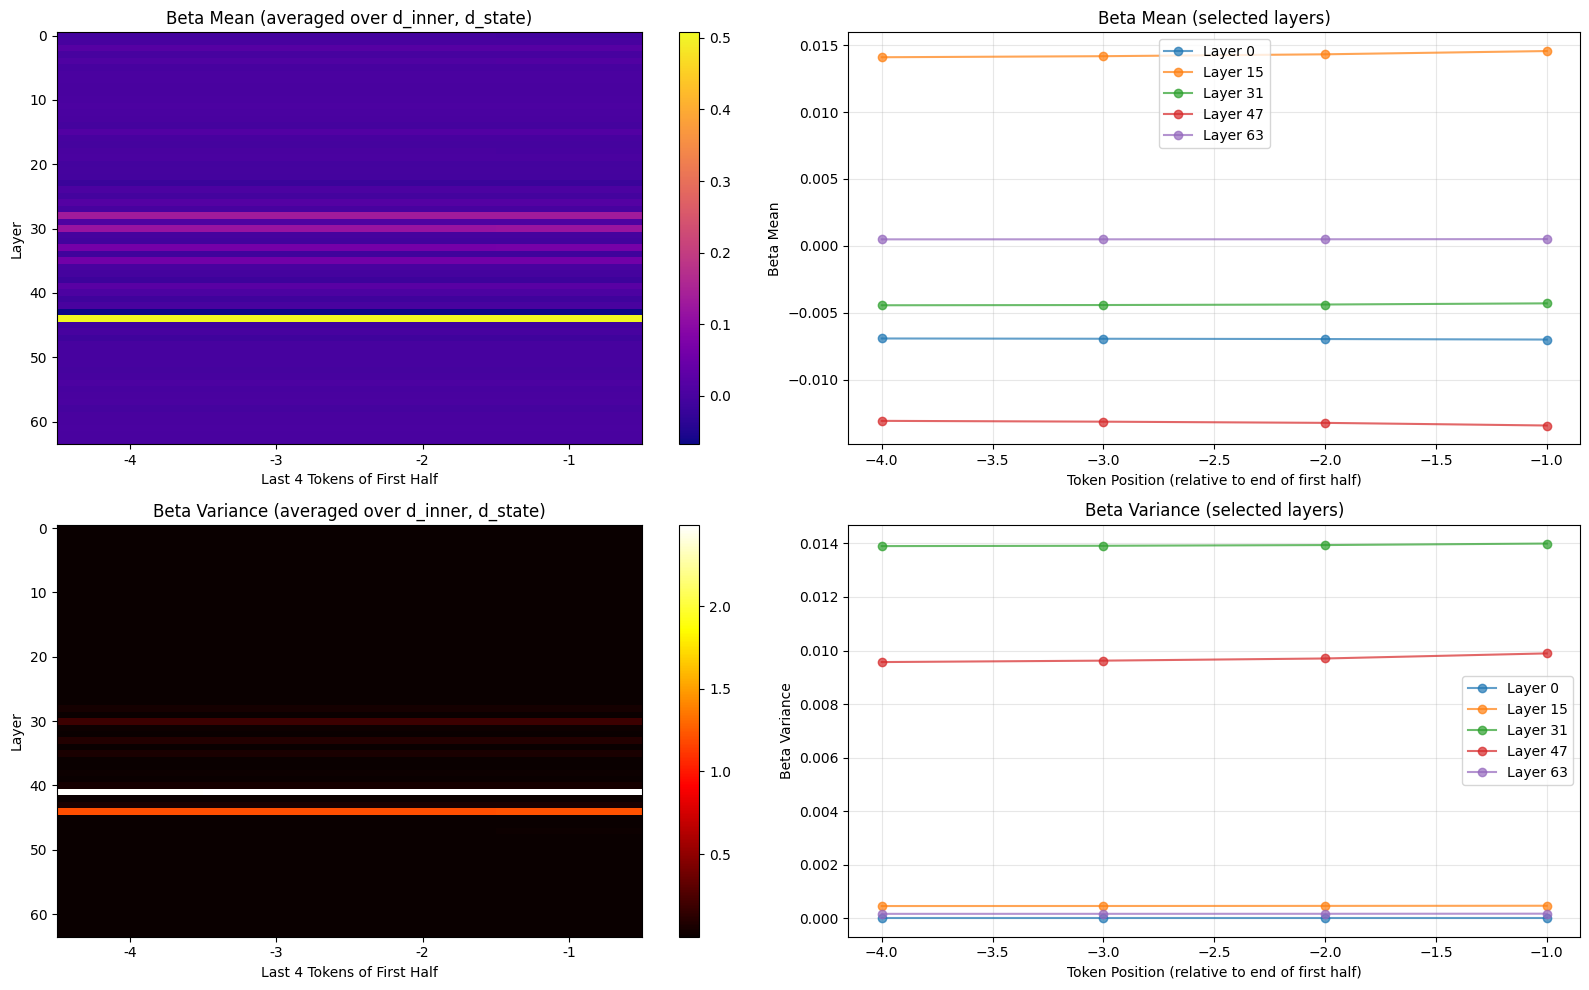

In [36]:
# Visualize Beta (state propagation weights)
beta_mean = data['beta_mean']  # [64, 4, 5120, 16]
beta_var = data['beta_var']

# Average across d_inner and d_state to get [64, 4]
beta_mean_avg = beta_mean.mean(dim=(2, 3))
beta_var_avg = beta_var.mean(dim=(2, 3))

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
selected_layers = [0, 15, 31, 47, 63]
x_pos = [-4, -3, -2, -1]

# Row 1: Beta Mean
im1 = axes[0, 0].imshow(beta_mean_avg.cpu().numpy(), aspect='auto', cmap='plasma', interpolation='nearest')
axes[0, 0].set_xlabel('Last 4 Tokens of First Half')
axes[0, 0].set_ylabel('Layer')
axes[0, 0].set_title('Beta Mean (averaged over d_inner, d_state)')
axes[0, 0].set_xticks([0, 1, 2, 3])
axes[0, 0].set_xticklabels(['-4', '-3', '-2', '-1'])
plt.colorbar(im1, ax=axes[0, 0])

for layer in selected_layers:
    axes[0, 1].plot(x_pos, beta_mean_avg[layer].cpu().numpy(), marker='o', label=f'Layer {layer}', alpha=0.7)
axes[0, 1].set_xlabel('Token Position (relative to end of first half)')
axes[0, 1].set_ylabel('Beta Mean')
axes[0, 1].set_title('Beta Mean (selected layers)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Row 2: Beta Variance
im2 = axes[1, 0].imshow(beta_var_avg.cpu().numpy(), aspect='auto', cmap='hot', interpolation='nearest')
axes[1, 0].set_xlabel('Last 4 Tokens of First Half')
axes[1, 0].set_ylabel('Layer')
axes[1, 0].set_title('Beta Variance (averaged over d_inner, d_state)')
axes[1, 0].set_xticks([0, 1, 2, 3])
axes[1, 0].set_xticklabels(['-4', '-3', '-2', '-1'])
plt.colorbar(im2, ax=axes[1, 0])

for layer in selected_layers:
    axes[1, 1].plot(x_pos, beta_var_avg[layer].cpu().numpy(), marker='o', label=f'Layer {layer}', alpha=0.7)
axes[1, 1].set_xlabel('Token Position (relative to end of first half)')
axes[1, 1].set_ylabel('Beta Variance')
axes[1, 1].set_title('Beta Variance (selected layers)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [37]:
# Summary
print("=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"\nDoc2 ID: {data['doc2_id']}")
print(f"Aggregated over: {data['num_doc1_samples']} doc1 samples")
print(f"Max sequence length: {data['max_seqlen']} tokens")
print()
print("Data Structure:")
print(f"  • alpha_mean/var: [64 layers, {data['max_seqlen']} tokens, 5120 channels]")
print(f"  • beta_mean/var:  [64 layers, 4 tokens, 5120 channels, 16 states]")
print()
print("Interpretation:")
print("  • Alpha: Attention scores from each token → LAST token")
print("  • Beta:  State propagation from doc1 last 4 tokens → doc2 LAST token")
print("  • Statistics computed via Welford's online algorithm (O(1) memory)")
print("=" * 70)


SUMMARY

Doc2 ID: 5ae03a3655429942ec259c50
Aggregated over: 1000 doc1 samples
Max sequence length: 504 tokens

Data Structure:
  • alpha_mean/var: [64 layers, 504 tokens, 5120 channels]
  • beta_mean/var:  [64 layers, 4 tokens, 5120 channels, 16 states]

Interpretation:
  • Alpha: Attention scores from each token → LAST token
  • Beta:  State propagation from doc1 last 4 tokens → doc2 LAST token
  • Statistics computed via Welford's online algorithm (O(1) memory)
